# Loading the Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
from matplotlib.gridspec import GridSpec

In [5]:
from subprocess import check_output

# Reading the Dataset

In [6]:
death = pd.read_csv('Celebrity Deaths.csv')

In [7]:
death.head()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0


In [8]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21438 entries, 0 to 21437
Data columns (total 9 columns):
age               21438 non-null int64
birth_year        21438 non-null int64
cause_of_death    8972 non-null object
death_month       21438 non-null object
death_year        21438 non-null int64
famous_for        21420 non-null object
name              21438 non-null object
nationality       21438 non-null object
fame_score        21380 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ MB


In [9]:
def group_deathcause(cause):
    mod_cause = ""
    cause = str(cause)
    if "cancer" in cause:
        mod_cause = "cancer"
    elif "heart" in cause or "cardiac" in cause:
        mod_cause = "heart disease"
    else:
        mod_cause = cause
    return mod_cause

# Checking for Null Values

In [10]:
death.isnull()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


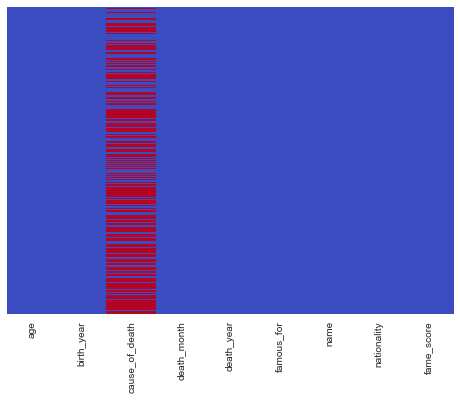

In [11]:
sns.heatmap(death.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [12]:
death_all = death.copy()
death_all["cause_of_death"].fillna("unknown",inplace=True)
death_all["cause_of_death"] = death_all.apply (lambda row:group_deathcause(row["cause_of_death"]) , axis = 1)
death_2016 = death_all[death_all.death_year == 2016]
death_rest_2016 = death_all[death_all.death_year != 2016]

# Exploratory Data Analysis

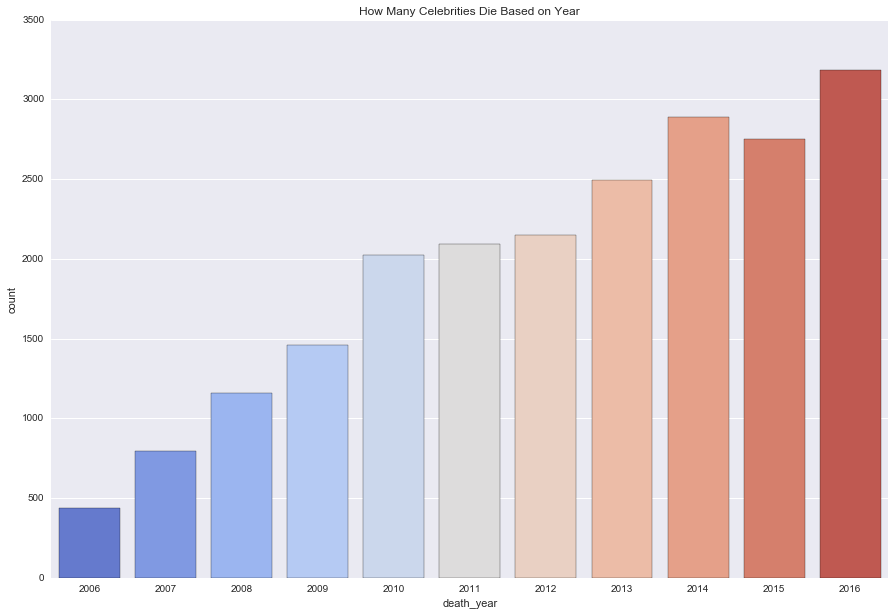

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(death_all.death_year, palette='coolwarm')
plt.title("How Many Celebrities Die Based on Year")

# Causes of Death

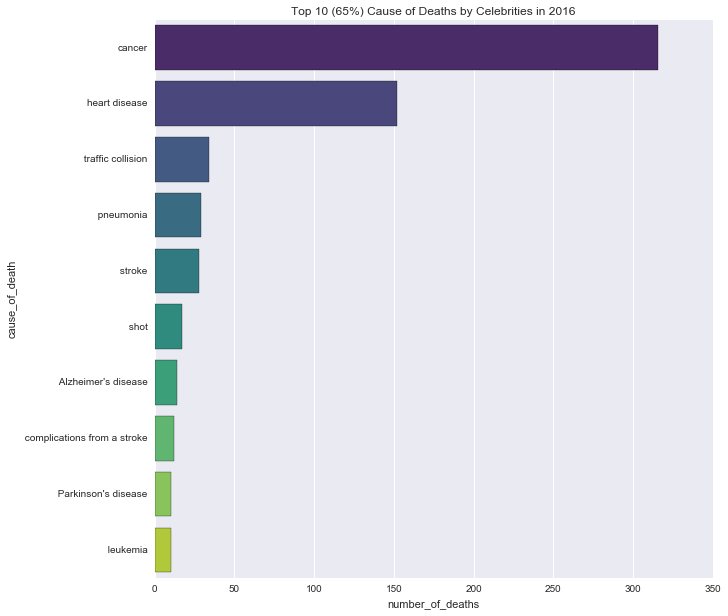

In [14]:
x = death_2016[death_2016.cause_of_death != "unknown"].groupby("cause_of_death")["name"].count().reset_index()
x = x.rename(columns ={"name":"count"})
total_causeofdeath = x["count"].sum()
x["ratio"] = x.apply(lambda row: row["count"]/total_causeofdeath,axis=1)
x= x.sort_values(by="ratio",ascending=False)
dy = x.head(10)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="count", y ="cause_of_death", data = dy, palette='viridis')
ax.set(xlabel='number_of_deaths')
sns.despine(left=True, bottom=True)
plt.title("Top 10 (65%) Cause of Deaths by Celebrities in 2016")

# Which is Deadliest?

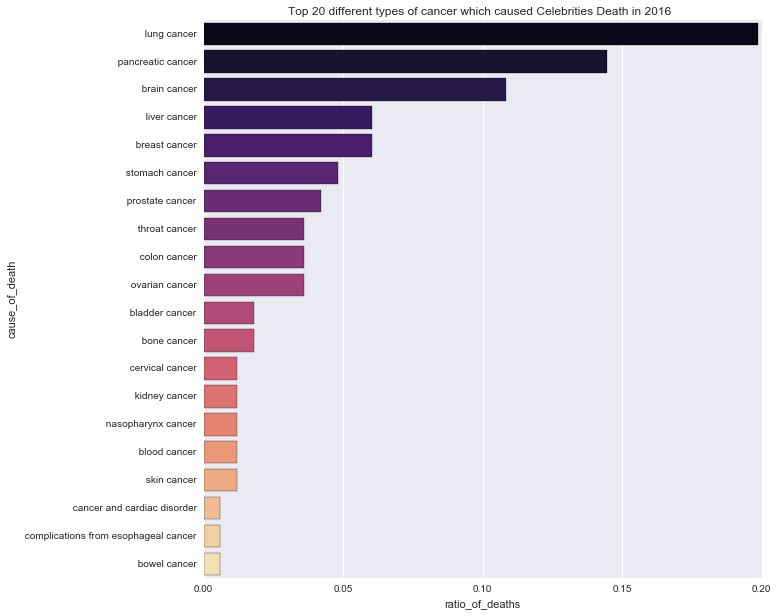

In [16]:
death_copy2 = death.copy()
death_copy2["cause_of_death"].fillna("unknown",inplace=True)

#selecting all rows re
x =death_copy2[ (death_copy2["cause_of_death"].str.contains("cancer") )&( death_copy2["death_year"] == 2016 )].groupby("cause_of_death")["name"].count().sort_values(ascending=False).reset_index().rename(columns={"name":"count"}).iloc[1:,:]
x_sum = x["count"].sum()
x["ratio"] = x.apply(lambda row : row["count"]/x_sum ,axis=1)
xtop_20 = x.head(20)

plt.figure(figsize=(10,10))
ax=sns.barplot(y="cause_of_death",x="ratio",data=xtop_20, palette='magma')
ax.set(xlabel='ratio_of_deaths')
plt.title("Top 20 different types of cancer which caused Celebrities Death in 2016  ")
plt.show()


# Deaths By Month

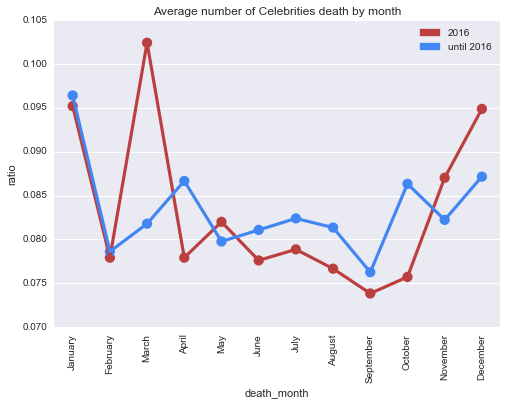

In [17]:
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
mnth_index = []
death_by_month = death_2016.groupby("death_month")["name"].count().reset_index().rename(columns={"name":"2016"})
for mnth in month_lst:
    mnth_index += death_by_month[death_by_month.death_month == mnth].index.tolist()
death_by_month_rest = death_rest_2016.groupby("death_month")["name"].count().reset_index().rename(columns={"name":"before2016"})
death_by_month = pd.merge(death_by_month,death_by_month_rest, on="death_month", how="left")
death_by_month = death_by_month.reindex(mnth_index)
tot_2016_deaths = death_by_month["2016"].sum()
tot_before2016_deaths = death_by_month["before2016"].sum()
death_by_month["2016_ratio"] = death_by_month.apply(lambda row: row["2016"]/tot_2016_deaths , axis=1)
death_by_month["before2016_ratio"] = death_by_month.apply(lambda row: row["before2016"]/tot_before2016_deaths , axis=1)
ax = sns.pointplot(x="death_month", y="2016_ratio", data=death_by_month,color="#bb3f3f", label="2016")
ax = sns.pointplot(x="death_month", y="before2016_ratio", data=death_by_month,color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=death_by_month.death_month)
ax.set(ylabel='ratio')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='2016')
blu_patch = mpatches.Patch(color="#4286f4", label='until 2016')
plt.legend(handles=[red_patch,blu_patch])
plt.title("Average number of Celebrities death by month")
plt.show()


# By Nationality

In [18]:
d_16 = death_2016.groupby("nationality")["name"].count().sort_values(ascending=False).reset_index().rename(columns={"name":"count"})
tot = d_16["count"].sum()
d_16["2016_March_ratio"] = d_16.apply(lambda row : row["count"]/tot,axis =1)
d_rest = death_rest_2016.groupby("nationality")["name"].count().sort_values(ascending=False).reset_index().rename(columns={"name":"count"})
tot = d_rest["count"].sum()
d_rest["before2016_March_ratio"] = d_rest.apply(lambda row : row["count"]/tot,axis =1)

march_nationality = pd.merge(d_16,d_rest[["nationality","before2016_March_ratio"]],on="nationality",how="left")
march_nationality = march_nationality.head(15)

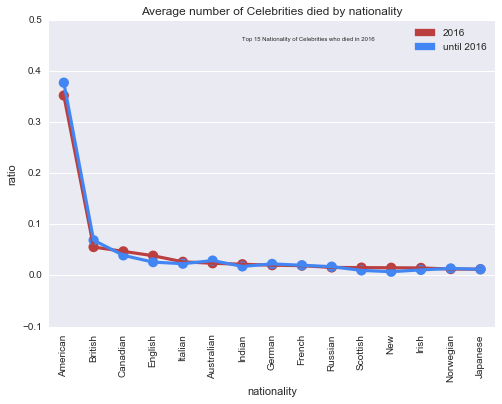

In [19]:
ax = sns.pointplot(x="nationality", y="2016_March_ratio", data=march_nationality,color="#bb3f3f", label="2016")
ax = sns.pointplot(x="nationality", y="before2016_March_ratio", data=march_nationality,color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=march_nationality.nationality)
ax.set(ylabel='ratio')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='2016')
blu_patch = mpatches.Patch(color="#4286f4", label='until 2016')
plt.legend(handles=[red_patch,blu_patch])
plt.title("Average number of Celebrities died by nationality")
ax.text(6.0, 0.46, "Top 15 Nationality of Celebrities who died in 2016", ha ='left', fontsize = 6)
plt.show()

# By Age

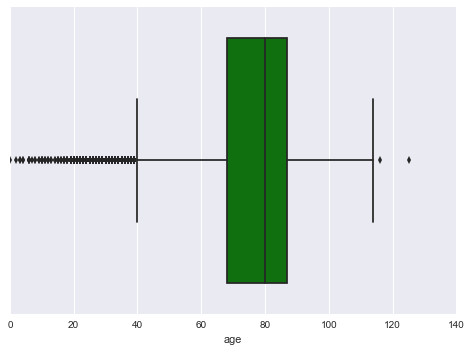

In [20]:
sns.boxplot(death.age,color='green')

# Causes of Death

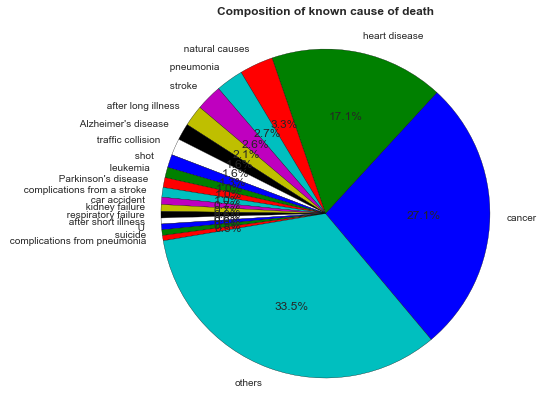

In [21]:
death_cause = death_all.groupby("cause_of_death")["name"].count().sort_values(ascending=False)
#death_cause.head(20)
comp = death_cause.ix[1:20]
y = death_cause.ix[21:].sum()
comp['others'] = y
plt.figure(figsize=(5,5))
plt.pie(comp,labels=comp.index, autopct='%1.1f%%', startangle=310 )
plt.tight_layout()
plt.axis('equal')
plt.title("Composition of known cause of death",y=1.08,fontweight="bold")

# By Age Category

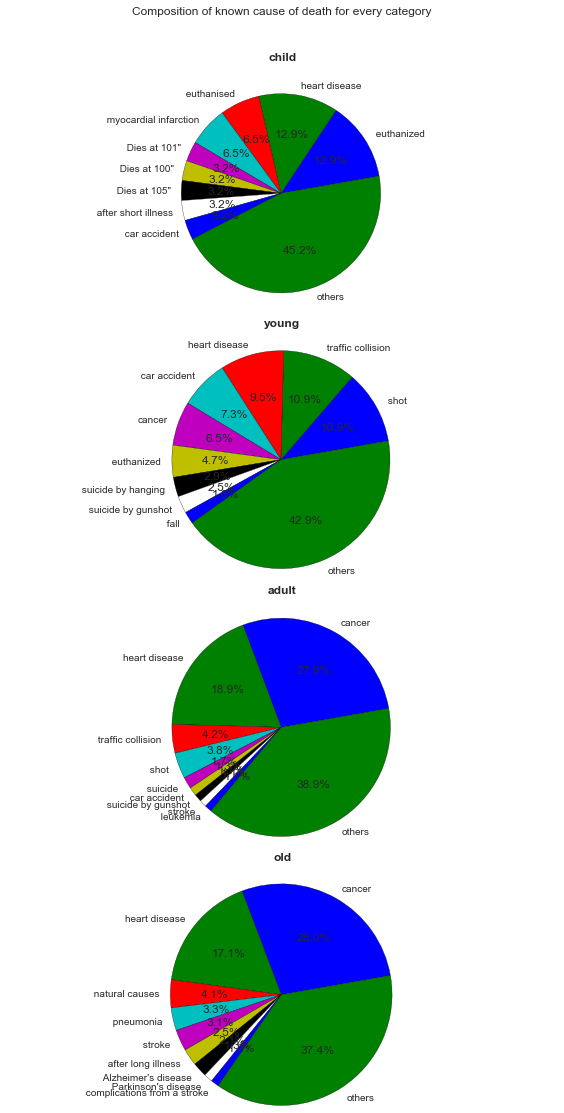

In [22]:
def age_categorizer(age):
    category = ""
    if (age<18):
        category = "child"
    elif (age<30):
        category = "young"
    elif (age<60) :
        category = "adult"
    else:
        category = "old"
    return category
death_all["age_category"] = death_all.apply (lambda row: age_categorizer (row["age"]),axis=1)
age_category_rep =death_all.groupby(["age_category","cause_of_death"])["name"].count().sort_values(ascending=False)
f = plt.figure(figsize=(8,15))
the_grid = GridSpec(4, 1)
for cat in [("child",0,0),("young",1,0),("adult",2,0),("old",3,0)]:
    x = age_category_rep[cat[0]][1:10]
    y = age_category_rep[cat[0]][11:].sum()
    plt.subplot(the_grid[cat[1],cat[2] ], aspect=1)
    x["others"] = y    
    plt.pie(x, labels =x.index, autopct='%1.1f%%', startangle=10 )
    plt.axis('equal')
    plt.title(cat[0],y=1.08,fontweight="bold")
    plt.tight_layout()
f.suptitle("Composition of known cause of death for every category",y=1.03)
plt.show()